In [4]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import json

In [5]:
filename = "master.csv"

In [ ]:

songtitle = list(set(df['sound']))


conceited_df = saveTimeStamp('conceited')
mwahmwah_df = saveTimeStamp('mwahmwah')
savage_df = saveTimeStamp('savage')
watertyla_df = saveTimeStamp('watertyla')
tyla_df = saveTimeStamp('tyla')
itgirl_df = saveTimeStamp('itgirl')
nowahala_df = saveTimeStamp('nowahala')
fancylike_df = saveTimeStamp('fancylike')
dropittothefloor_df = saveTimeStamp('dropittothefloor')
glo_df = saveTimeStamp('glo')
flomilli_df = saveTimeStamp('flomilli')
up_df = saveTimeStamp('up')
heartbreak_df = saveTimeStamp('heartbreak')
wannabe_df = saveTimeStamp('wannabe')
thisyear_df = saveTimeStamp('thisyear')
sweaterweather_df = saveTimeStamp('sweaterweather')
bam_df = saveTimeStamp('bam')



In [50]:
def makeTS(filename):
    df = pd.read_csv(filename)
    
    newlist = []
    
    for row in df['video_timestamp']:
        timestamp = str(row).split("T")
        newlist.append(" ".join(timestamp))
    df['video_timestamp_new'] = newlist

    dates = pd.to_datetime(df['video_timestamp_new'], errors='coerce')
    df.dropna(subset=['video_timestamp_new'], inplace=True)

    df = df.iloc[:len(df['video_timestamp_new'])]
    
    ts = Series(list(df['video_likecount']), index=dates)

    return ts



def makeSubplot(ts,period,ax,color,label):
    watches = ts.resample(period).count()
    
    if period =='W':
        time = 'week'
    elif period == 'M':
        time = 'month'
    elif period == 'D':
        time = 'day' 
        
    plt.plot(watches.index,watches,color=color, label=label)
    #axs[ax].legend()
    
def makePlot(data,period):
    #fig, axs = plt.subplots(len(data), 1, figsize=(10,len(data)*2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data))  # Generate color based on position
        label = filename[8:-5]
        makeSubplot(ts,period,i,color,label)
        
    codes = [file[8:-5] for file in data]
    #fig.legend(codes, loc='upper right')
    
    plt.tight_layout()
    plt.show()

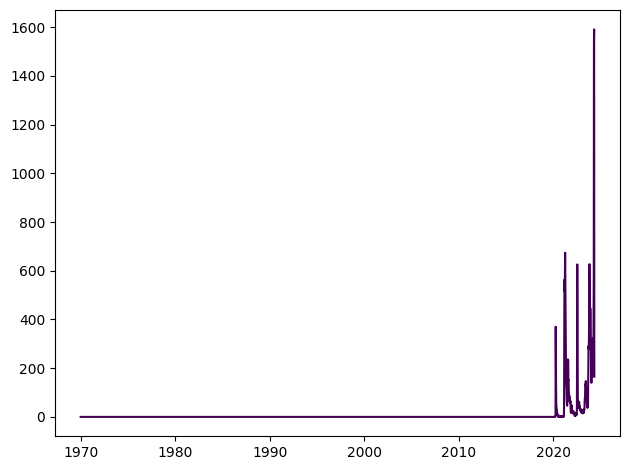

In [51]:
data = ['master.csv']
makePlot(data,'W')